# Covid-19

Дана статистика заболеваемости коронавирусом за определенный промежуток в разных странах, записанная в файл covid-19cases.csv. Необходимо: 
1. Произвести очистку данных, убрав пустые столбцы и неинформативные строки (строки, выделенные для заметок for Notes) 
2. Определить статистику случаев заражения в разных частях света (столбец continent) за каждый месяц 
3. Определить корреляцию каждой части света с другой.
4. Вывести название части света, которая меньше всего коррелирует с другими

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Произвести очистку данных, убрав пустые столбцы и неинформативные строки (строки, выделенные для заметок for Notes) 

In [2]:
df = pd.read_csv('Data\covid-19cases.csv', index_col=0)
df.head()

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 40,Unnamed: 41,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
1,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
3,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105748 entries, 0 to 105747
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   date                             105748 non-null  object 
 1   continent                        52269 non-null   object 
 2   location                         52873 non-null   object 
 3   total_cases                      49259 non-null   float64
 4   new_cases                        51979 non-null   float64
 5   new_cases_smoothed               51185 non-null   float64
 6   total_deaths                     40323 non-null   float64
 7   new_deaths                       51979 non-null   float64
 8   new_deaths_smoothed              51185 non-null   float64
 9   total_cases_per_million          48993 non-null   float64
 10  new_cases_per_million            51915 non-null   float64
 11  new_cases_smoothed_per_million   51120 non-null   float64
 12  to

### 1.1 Удалим пустые столбцы

In [4]:
df.drop(columns=['Unnamed: 40', 'Unnamed: 41'], inplace=True)

### 1.2 Удалим строки, выделенные для заметок for Notes

In [5]:
df.date.unique()

array(['13-03-20', 'For Notes: ', '19-03-20', '20-03-20', '21-03-20',
       '22-03-20', '23-03-20', '24-03-20', '25-03-20', '26-03-20',
       '27-03-20', '28-03-20', '29-03-20', '30-03-20', '31-03-20',
       '01-04-20', '02-04-20', '03-04-20', '04-04-20', '05-04-20',
       '06-04-20', '07-04-20', '08-04-20', '09-04-20', '10-04-20',
       '11-04-20', '12-04-20', '13-04-20', '14-04-20', '15-04-20',
       '16-04-20', '17-04-20', '18-04-20', '19-04-20', '20-04-20',
       '21-04-20', '22-04-20', '23-04-20', '24-04-20', '25-04-20',
       '26-04-20', '27-04-20', '28-04-20', '29-04-20', '30-04-20',
       '01-05-20', '02-05-20', '03-05-20', '04-05-20', '05-05-20',
       '06-05-20', '07-05-20', '08-05-20', '09-05-20', '10-05-20',
       '11-05-20', '12-05-20', '13-05-20', '14-05-20', '15-05-20',
       '16-05-20', '17-05-20', '18-05-20', '19-05-20', '20-05-20',
       '21-05-20', '22-05-20', '23-05-20', '24-05-20', '25-05-20',
       '26-05-20', '27-05-20', '28-05-20', '29-05-20', '30-

In [6]:
df.loc[1,'date']

'For Notes: '

In [7]:
df = df[~(df['date'] == 'For Notes: ')]
df.head()

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0


### 1.3 Удалим строки c пропуском в continent

In [8]:
df.continent.unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', nan], dtype=object)

In [9]:
df['continent'].isna().value_counts()

False    52269
True       604
Name: continent, dtype: int64

In [10]:
df = df[~df['continent'].isna()]
df

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.000,37.465,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104530,23-10-20,Africa,Zimbabwe,8242.0,27.0,23.857,236.0,0.0,0.714,554.534,...,1.82,1.6,30.7,36.791,1.7,61.49,0.535,ZWE,10.0,20.0
104532,24-10-20,Africa,Zimbabwe,8257.0,15.0,22.571,236.0,0.0,0.714,555.543,...,1.82,1.6,30.7,36.791,1.7,61.49,0.535,ZWE,10.0,20.0
104534,25-10-20,Africa,Zimbabwe,8269.0,12.0,22.714,236.0,0.0,0.714,556.351,...,1.82,1.6,30.7,36.791,1.7,61.49,0.535,ZWE,10.0,20.0
104536,26-10-20,Africa,Zimbabwe,8276.0,7.0,18.429,237.0,1.0,0.857,556.822,...,1.82,1.6,30.7,36.791,1.7,61.49,0.535,ZWE,10.0,20.0


In [11]:
df.continent.unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania'], dtype=object)

## 2. Определить статистику случаев заражения в разных частях света (столбец continent) за каждый месяц

### 2.1 Подготовим таблицу с нужными столбцами и создадим помесячный признак

Сконвертируем дату в тип данных дата

In [12]:
df['date'] = pd.to_datetime(df['date'])

Создадим колонку с годом и месяцем

In [13]:
df['year_month'] = df['date'].dt.strftime('%Y-%m')
df.head(2)

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year,year_month
0,2020-03-13,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0,2020-03
2,2020-03-19,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0,2020-03


Выберем колонки, характерезующие заражение

In [14]:
columns = ['year_month', 'continent', 'total_cases', 'new_cases', 'new_cases_smoothed',\
           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million',\
           ]
df = df[columns]
df.head(7)

,year_month,continent,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
0,2020-03,North America,2.0,2.0,NaN,18.733,18.733,NaN
2,2020-03,North America,NaN,NaN,0.286,NaN,NaN,2.676
4,2020-03,North America,4.0,2.0,0.286,37.465,18.733,2.676
6,2020-03,North America,NaN,NaN,0.286,NaN,NaN,2.676
8,2020-03,North America,NaN,NaN,0.286,NaN,NaN,2.676
10,2020-03,North America,NaN,NaN,0.286,NaN,NaN,2.676
12,2020-03,North America,12.0,8.0,1.429,112.395,74.930,13.380


### 2.2 Сгруппируем по континентам и месяцам

In [15]:
df.groupby(['year_month', 'continent']).agg({'new_cases': 'sum', 'new_cases_smoothed': 'sum',\
                                             'new_cases_per_million': 'sum',
                                            'new_cases_smoothed_per_million': 'sum'})

new_cases  new_cases_smoothed  \
year_month continent                                      
2019-12    Africa               0.0               0.000   
           Asia                27.0               0.000   
           Europe               0.0               0.000   
           North America        0.0               0.000   
           Oceania              0.0               0.000   
...                             ...                 ...   
2020-12    Asia            436823.0          432379.152   
           Europe          251662.0          247899.714   
           North America   322947.0          329166.862   
           Oceania            893.0            1119.147   
           South America   312545.0          294935.140   

                          new_cases_per_million  \
year_month continent                              
2019-12    Africa                         0.000   
           Asia                           0.019   
           Europe                         0.000   
           North America                  0.000   
           Oceania                        0.000   
...                                         ...   
2020-12    Asia                       10859.917   
           Europe                     15399.465   
           North America               9410.501   
           Oceania                      924.755   
           South America               5530.918   

                          new_cases_smoothed_per_million  
year_month continent                                      
2019-12    Africa                                  0.000  
           Asia                                    0.000  
           Europe                                  0.000  
           North America                           0.000  
           Oceania                                 0.000  
...                                                  ...  
2020-12    Asia                                11429.482  
           Europe                              17571.714  
           North America                        9640.360  
           Oceania                              1282.373  
           South America                        5442.640  

[78 rows x 4 columns]

In [16]:
df_continent = df.groupby(['year_month', 'continent'], as_index=False).agg({'new_cases': 'sum', 'new_cases_smoothed': 'sum',\
                                             'new_cases_per_million': 'sum',
                                            'new_cases_smoothed_per_million': 'sum'})
df_continent.head(10)

,year_month,continent,new_cases,new_cases_smoothed,new_cases_per_million,new_cases_smoothed_per_million
0,2019-12,Africa,0.0,0.000,0.000,0.000
1,2019-12,Asia,27.0,0.000,0.019,0.000
2,2019-12,Europe,0.0,0.000,0.000,0.000
3,2019-12,North America,0.0,0.000,0.000,0.000
4,2019-12,Oceania,0.0,0.000,0.000,0.000
5,2019-12,South America,0.0,0.000,0.000,0.000
6,2020-01,Africa,52069.0,51020.993,3027.647,2889.023
7,2020-01,Asia,431212.0,395755.594,12437.937,10853.212
8,2020-01,Europe,201780.0,196324.151,15687.469,14305.698
9,2020-01,North America,320756.0,313561.573,7978.979,8696.777


[Множественные столбчатые графики](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)

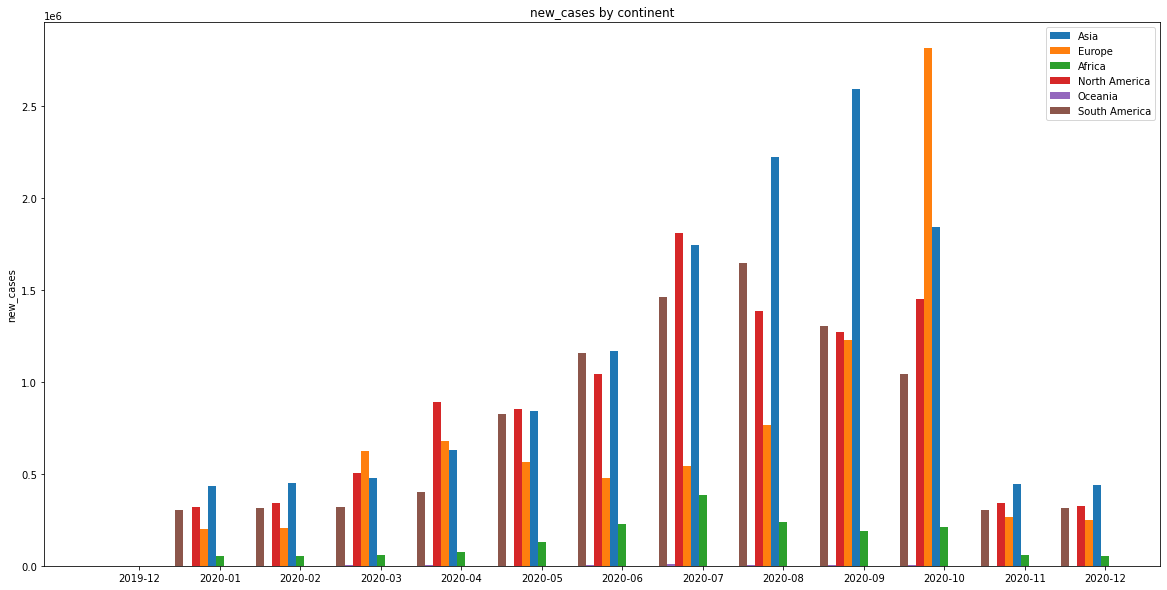

In [17]:
labels = df_continent.year_month.unique()
x = np.arange(len(labels))
width = 0.1
fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width, df_continent[df_continent['continent'] == 'Asia']['new_cases'],\
                width, label='Asia')
rects2 = ax.bar(x - 2*width, df_continent[df_continent['continent'] == 'Europe']['new_cases'],\
                width, label='Europe')
rects3 = ax.bar(x, df_continent[df_continent['continent'] == 'Africa']['new_cases'],\
                width, label='Africa')
rects4 = ax.bar(x- 3*width, df_continent[df_continent['continent'] == 'North America']['new_cases'],\
                width, label='North America')
rects5 = ax.bar(x- 4*width, df_continent[df_continent['continent'] == 'Oceania']['new_cases'],\
                width, label='Oceania')
rects6 = ax.bar(x - 5*width, df_continent[df_continent['continent'] == 'South America']['new_cases'],\
                width, label='South America')

ax.set_ylabel('new_cases')
ax.set_title('new_cases by continent')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [18]:
# Для мультииндекса
# df_continent.xs('Asia', level=1)

## 3. Определить корреляцию каждой части света с другой

In [19]:
pd.pivot_table(df_continent, values=['new_cases', 'new_cases_smoothed', 'new_cases_per_million',\
                                     'new_cases_smoothed_per_million'], index=['year_month'],

                    columns=['continent'], aggfunc=np.sum).corr()

new_cases                      \
continent                                       Africa      Asia    Europe   
                               continent                                     
new_cases                      Africa         1.000000  0.799905  0.412874   
                               Asia           0.799905  1.000000  0.620554   
                               Europe         0.412874  0.620554  1.000000   
                               North America  0.941582  0.876718  0.608377   
                               Oceania        0.708363  0.615802  0.523384   
                               South America  0.924040  0.925483  0.456753   
new_cases_per_million          Africa         0.935452  0.895837  0.577483   
                               Asia           0.865035  0.896076  0.677023   
                               Europe         0.376368  0.566572  0.990519   
                               North America  0.724359  0.965031  0.568649   
                               Oceania        0.363952  0.610357  0.964723   
                               South America  0.870316  0.944509  0.503206   
new_cases_smoothed             Africa         0.998954  0.803445  0.400869   
                               Asia           0.783563  0.999190  0.643008   
                               Europe         0.426879  0.639269  0.998443   
                               North America  0.941240  0.875672  0.579020   
                               Oceania        0.752818  0.701614  0.515591   
                               South America  0.916991  0.937445  0.466148   
new_cases_smoothed_per_million Africa         0.948994  0.908949  0.588148   
                               Asia           0.881730  0.902113  0.651530   
                               Europe         0.383837  0.588035  0.995157   
                               North America  0.719396  0.961528  0.557767   
                               Oceania        0.395272  0.644967  0.965654   
                               South America  0.874221  0.957197  0.522098   

                                                                      \
continent                                    North America   Oceania   
                               continent                               
new_cases                      Africa             0.941582  0.708363   
                               Asia               0.876718  0.615802   
                               Europe             0.608377  0.523384   
                               North America      1.000000  0.752100   
                               Oceania            0.752100  1.000000   
                               South America      0.923570  0.649348   
new_cases_per_million          Africa             0.960950  0.664282   
                               Asia               0.932080  0.567659   
                               Europe             0.566878  0.568246   
                               North America      0.820437  0.664986   
                               Oceania            0.532622  0.479920   
                               South America      0.911969  0.615214   
new_cases_smoothed             Africa             0.940609  0.718560   
                               Asia               0.867825  0.605195   
                               Europe             0.628239  0.511608   
                               North America      0.998273  0.738711   
                               Oceania            0.804718  0.980015   
                               South America      0.920779  0.651032   
new_cases_smoothed_per_million Africa             0.971423  0.677193   
                               Asia               0.938823  0.577333   
                               Europe             0.586569  0.551896   
                               North America      0.816800  0.636667   
                               Oceania            0.561979  0.500575   
                               South America      0.916558  0.6236

In [20]:
df_corr = pd.pivot_table(df_continent, values=['new_cases', 'new_cases_smoothed', 'new_cases_per_million',\
                                     'new_cases_smoothed_per_million'], index=['year_month'],

                    columns=['continent'], aggfunc=np.sum).corr()

<AxesSubplot:xlabel='None-continent', ylabel='None-continent'>

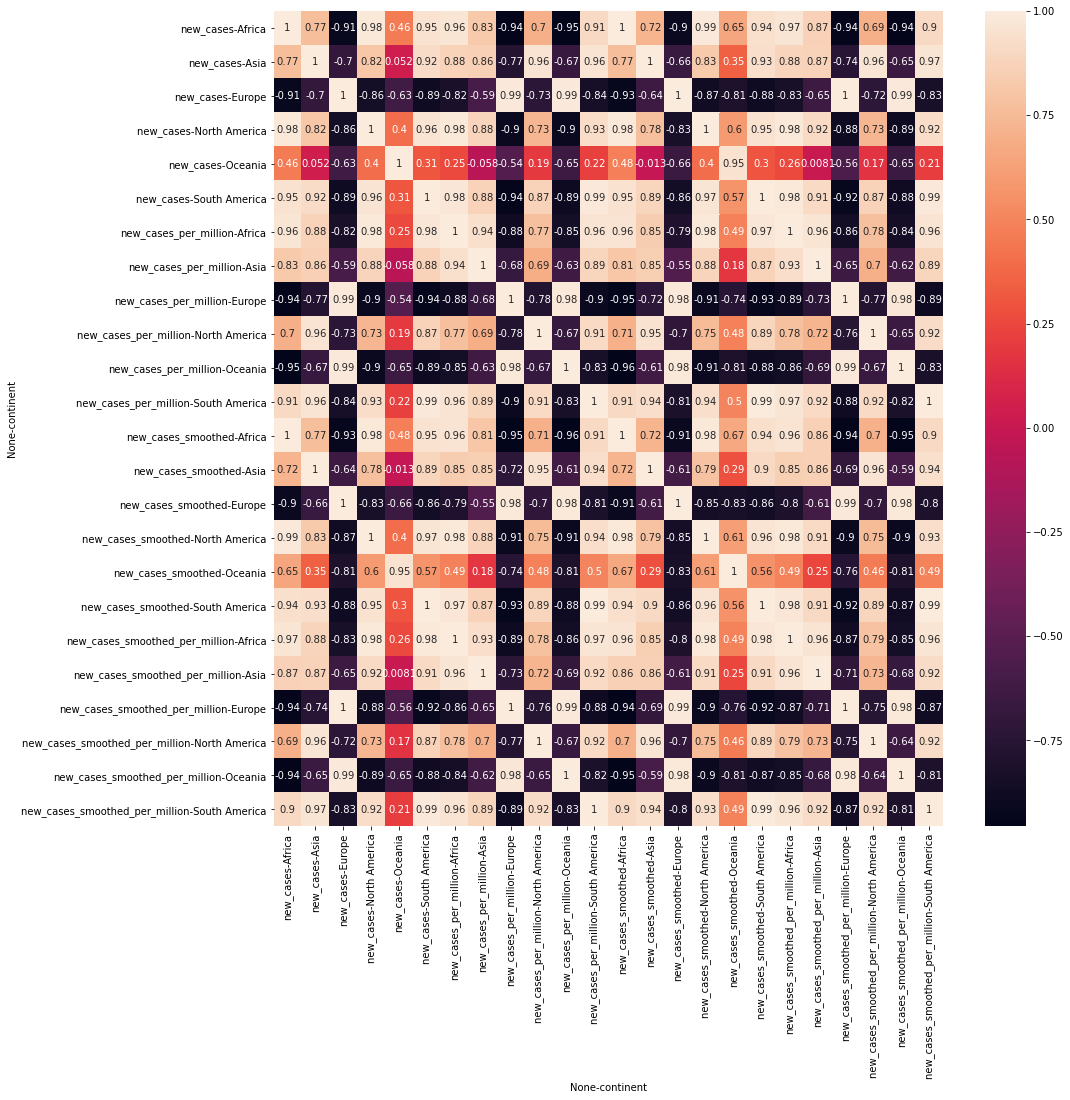

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr.corr(), annot=True)

In [22]:
df_corr2 = pd.pivot_table(df_continent, values=['new_cases'], index=['year_month'],

                    columns=['continent'], aggfunc=np.mean).corr()

<AxesSubplot:xlabel='None-continent', ylabel='None-continent'>

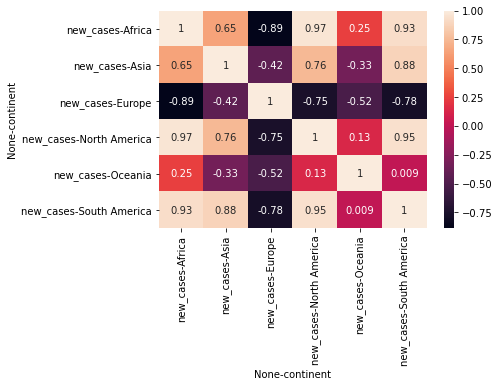

In [23]:
sns.heatmap(df_corr2.corr(), annot=True)

## 4. Вывести название части света, которая меньше всего коррелирует с другими

Меньше всех коррелирует (в численном значение, то есть самое мальнько число) - Европа